In [25]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from surprise import Dataset
from surprise import Reader
from surprise.model_selection.validation  import cross_validate
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise import accuracy
from surprise.model_selection import KFold
from surprise.model_selection import train_test_split
from sklearn.metrics import  roc_curve
from sklearn.metrics import roc_auc_score
from surprise.prediction_algorithms.matrix_factorization import NMF

#r"C:\Users\Ryan\Desktop\ECE 219\ml-latest-small/ratings.csv"


ratings = pd.read_csv(r"C:\Users\Ryan\Desktop\ECE 219\ml-latest-small/ratings.csv")

print(ratings)

#build rating matrix?
# movie id --->   . . . (last col rating)
#user id going down

R_dataframe = ratings.pivot_table('rating', 'userId', 'movieId', fill_value=0)

#print(R_dataframe.head())

total_available_rating = len(ratings)
print(R_dataframe.shape)
total_possible_ratings = 610 * 9724
sparsity = total_available_rating / total_possible_ratings

print('Sparsity = ' +str(sparsity))

        userId  movieId  rating   timestamp
0            1        1     4.0   964982703
1            1        3     4.0   964981247
2            1        6     4.0   964982224
3            1       47     5.0   964983815
4            1       50     5.0   964982931
...        ...      ...     ...         ...
100831     610   166534     4.0  1493848402
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352
100835     610   170875     3.0  1493846415

[100836 rows x 4 columns]
(610, 9724)
Sparsity = 0.016999683055613623


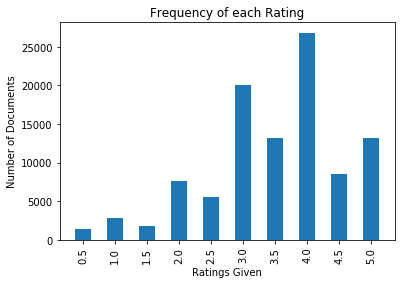

In [26]:
#question 2


R_matrix = R_dataframe.astype('int')
ratings_numbers = [0.5, 1.0, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

#need 5.5 to include 5 on the edge of the plot
ratings_axis = [0.5, 1.0, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5.0, 5.5]

plt.title("Frequency of each Rating")
plt.xticks(ticks=ratings_numbers, rotation='vertical')
plt.xlabel("Ratings Given")
#plt.yticks(np.arange(0,701,100))
plt.ylabel("Number of Documents")
#plt.bar(unique_categories, counts, align='center', tick_label=train_dataset.target_names)
plt.hist(ratings.rating, bins=ratings_axis, align='left', rwidth=0.5)

plt.show()



movieId
1         214
2         109
3          51
4           7
5          48
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Length: 9724, dtype: int64


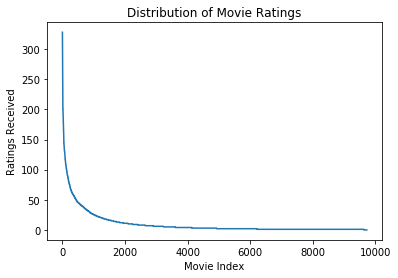

In [27]:
#question 3 - distribution of ratings among movies

movie_ratings_count = np.sum(R_matrix!=0, axis=0)

print(movie_ratings_count)

sorted_ratings = np.sort(movie_ratings_count)[::-1]


plt.plot(sorted_ratings)
plt.xlabel("Movie Index")
plt.ylabel("Ratings Received")
plt.title("Distribution of Movie Ratings")
plt.show()



movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1             4       0       4       0       0       4       0       0   
2             0       0       0       0       0       0       0       0   
3             0       0       0       0       0       0       0       0   
4             0       0       0       0       0       0       0       0   
5             4       0       0       0       0       0       0       0   
...         ...     ...     ...     ...     ...     ...     ...     ...   
606           2       0       0       0       0       0       2       0   
607           4       0       0       0       0       0       0       0   
608           2       2       2       0       0       0       0       0   
609           3       0       0       0       0       0       0       0   
610           5       0       0       0       0       5       0       0   

movieId  9       10     

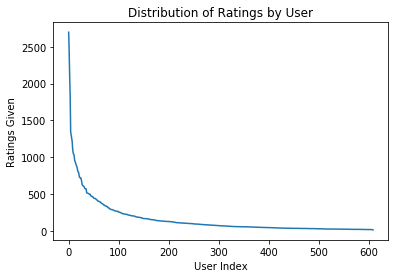

In [28]:
#question 4 - distribution of ratings among users
print(R_matrix)

user_ratings_count = np.sum(R_matrix!=0, axis=1)

print(user_ratings_count)

sorted_ratings = np.sort(user_ratings_count)[::-1]


plt.plot(sorted_ratings)
plt.xlabel("User Index")
plt.ylabel("Ratings Given")
plt.title("Distribution of Ratings by User")
plt.show()

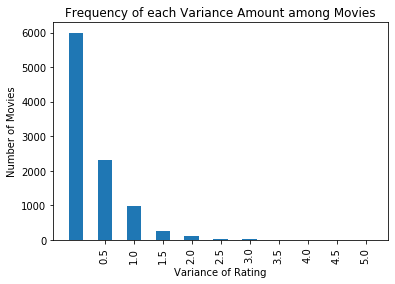

In [36]:
#question 5 - explain in report
#question 6 - compute variance of rating values received by each movie, plot variance



R_dataframe_var = ratings.pivot_table('rating', 'userId', 'movieId')
movie_rating_var = np.var(R_dataframe_var,axis=0)

ratings_axis_var = [0, 0.5, 1.0, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5.0, 5.5]


plt.title("Frequency of each Variance Amount among Movies")
plt.xticks(ticks=ratings_numbers, rotation='vertical')
plt.xlabel("Variance of Rating")
plt.ylabel("Number of Movies")
#plt.bar(unique_categories, counts, align='center', tick_label=train_dataset.target_names)
plt.hist(movie_rating_var, bins=ratings_axis_var, align='left', rwidth=0.5)

plt.show()

In [32]:
# question 7
# question 8
# question 9

#explain in report

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [47]:
# question 10

reader = Reader(line_format='user item rating', sep=',',skip_lines=1, rating_scale=(0.5, 5))
data = Dataset.load_from_file(r"C:\Users\Ryan\Desktop\ECE 219\ml-latest-small/ratings.csv", reader=reader)

RMSE = []
MAE = []

for k in range(2,101,2):
    knn = KNNWithMeans(k=k, sim_options = {'name': 'pearson'})
    cv = cross_validate(knn, data, measures=['RMSE','MAE'],cv=10, verbose=False)
    RMSE.append(np.mean(cv['test_rmse']))
    MAE.append(np.mean(cv['test_mae']))

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

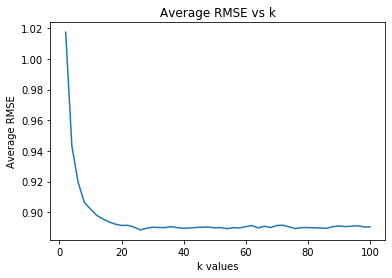

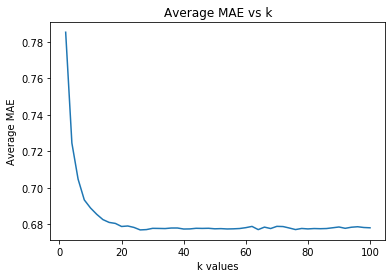

Minimum K for RMSE is: 18
Steady state value for RMSE is: 0.8913882609855349
Minimum K for MAE is: 28
Steady state value for MAE is: 0.6777827227865071


In [88]:
k_axis = range(2,101,2)
plt.plot(k_axis, RMSE)
plt.title("Average RMSE vs k")
plt.xlabel("k values")
plt.ylabel("Average RMSE")
plt.show()

plt.plot(k_axis, MAE)
plt.title("Average MAE vs k")
plt.xlabel("k values")
plt.ylabel("Average MAE")
plt.show()

#find minimum k and steady state values - question 11
RMSE_min_k = 2
MAE_min_k = 2

for k in range(1, 49):
    if(abs(RMSE[k] - RMSE[k+1]) < 0.0001):
        RMSE_min_k = k
        break
        
for k in range(1, 49):
    if(abs(MAE[k] - MAE[k+1]) < 0.0001):
        MAE_min_k = k
        break
        
RMSE_steady_state = RMSE[RMSE_min_k]
print("Minimum K for RMSE is: " +str(2*RMSE_min_k))
print("Steady state value for RMSE is: " +str(RMSE_steady_state))

MAE_steady_state = MAE[MAE_min_k]
print("Minimum K for MAE is: " +str(2*MAE_min_k))
print("Steady state value for MAE is: " +str(MAE_steady_state))


In [90]:
#question 11 alternative
#or just eyeball k = 20 or 22
RMSE_steady_state = RMSE[10]
print("Minimum K for RMSE is: " +str(20))
print("Steady state value for RMSE is: " +str(RMSE_steady_state))

MAE_steady_state = MAE[10]
print("Minimum K for MAE is: " +str(20))
print("Steady state value for MAE is: " +str(MAE_steady_state))

Minimum K for RMSE is: 20
Steady state value for RMSE is: 0.8914523611543306
Minimum K for MAE is: 20
Steady state value for MAE is: 0.6774651435929393


In [29]:
#question 12

#movie_ratings_count = np.sum(R_matrix!=0, axis=0)
#reader = Reader(line_format='user item rating', sep=',',skip_lines=1, rating_scale=(0.5, 5))
#data = Dataset.load_from_file(r"C:\Users\Ryan\Desktop\ECE 219\ml-latest-small/ratings.csv", reader=reader)

movie_ID = list(R_dataframe)

def trim_movie_popular(input_testset, ratings_count):
    # find the pop index
    R_matrix_pop_index = list(np.where(ratings_count > 2))[0]
    
    popular_movie_index = []
    for i in range(len(R_matrix_pop_index)):
        popular_movie_index.append(movie_ID[R_matrix_pop_index[i]])

    trimmed_testset = []
    for j in range(len(input_testset)):
        if int(input_testset[j][1]) in popular_movie_index:
            trimmed_testset.append(input_testset[j])
    return trimmed_testset


kf = KFold(n_splits=10)
RMSE_popular = []
for k in range(2,101,2):
    knn = KNNWithMeans(k=k, sim_options={'name': 'pearson'})
    RMSE_temp = []
    for trainset, testset in kf.split(data):
        knn.fit(trainset)
        popular_trimmed_test = trim_movie_popular(testset, movie_ratings_count )
        predictions = knn.test(popular_trimmed_test)
        # Compute and print Root Mean Squared Error
        RMSE_temp.append(accuracy.rmse(predictions, verbose=False))
    RMSE_popular.append(np.mean(RMSE_temp))
    
##typo below - code is repeated in next block    
k_axis = range(2,101,2)
plt.plot(k_axis, RMSE_popular)
plt.title("Average RMSE vs k for Popular Movies")
plt.xlabel("k values")
plt.ylabel("Average RMSE")
plt.show()

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

NameError: name 'RMSE_popular' is not defined

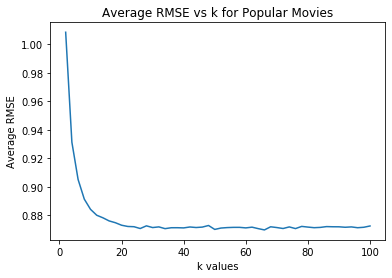

In [30]:
#plot here
k_axis = range(2,101,2)
plt.plot(k_axis, RMSE_popular)
plt.title("Average RMSE vs k for Popular Movies")
plt.xlabel("k values")
plt.ylabel("Average RMSE")
plt.show()

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

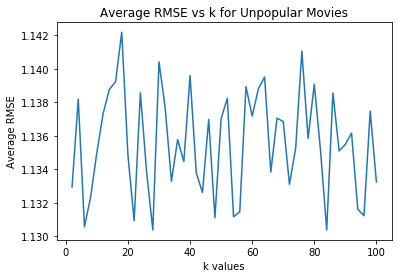

In [31]:
#question 13 - unpopular

#movie_ratings_count = np.sum(R_matrix!=0, axis=0)
#reader = Reader(line_format='user item rating', sep=',',skip_lines=1, rating_scale=(0.5, 5))
#data = Dataset.load_from_file(r"C:\Users\Ryan\Desktop\ECE 219\ml-latest-small/ratings.csv", reader=reader)

movie_ID = list(R_dataframe)

def trim_movie_unpopular(input_testset, ratings_count):
    R_matrix_unpop_index = list(np.where(ratings_count <= 2))[0]
    
    unpopular_movie_index = []
    for i in range(len(R_matrix_unpop_index)):
        unpopular_movie_index.append(movie_ID[R_matrix_unpop_index[i]])

    trimmed_testset = []
    for j in range(len(input_testset)):
        if int(input_testset[j][1]) in unpopular_movie_index:
            trimmed_testset.append(input_testset[j])
    return trimmed_testset


kf = KFold(n_splits=10)
RMSE_unpopular = []
for k in range(2,101,2):
    knn = KNNWithMeans(k=k, sim_options={'name': 'pearson'})
    RMSE_temp_unpop = []
    for trainset, testset in kf.split(data):
        knn.fit(trainset)
        unpopular_trimmed_test = trim_movie_unpopular(testset, movie_ratings_count )
        predictions = knn.test(unpopular_trimmed_test)
        # Compute and print Root Mean Squared Error
        RMSE_temp_unpop.append(accuracy.rmse(predictions, verbose=False))
    RMSE_unpopular.append(np.mean(RMSE_temp_unpop))
    
##typo below - code is repeated in next block    
k_axis = range(2,101,2)
plt.plot(k_axis, RMSE_unpopular)
plt.title("Average RMSE vs k for Unpopular Movies")
plt.xlabel("k values")
plt.ylabel("Average RMSE")
plt.show()

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

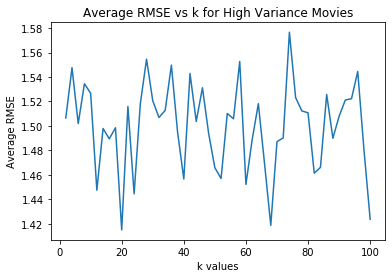

In [37]:
#question 14 - high variance and at least 5 ratings

#movie_ratings_count = np.sum(R_matrix!=0, axis=0)
#reader = Reader(line_format='user item rating', sep=',',skip_lines=1, rating_scale=(0.5, 5))
#data = Dataset.load_from_file(r"C:\Users\Ryan\Desktop\ECE 219\ml-latest-small/ratings.csv", reader=reader)

movie_ID = list(R_dataframe)
R_dataframe_var = ratings.pivot_table('rating', 'userId', 'movieId')
movie_rating_var = np.var(R_dataframe_var,axis=0)
movie_var_list = list(movie_rating_var)

def trim_movie_variance(input_testset, ratings_count, movie_variance_list):
    #first filter by 5+ ratings
    R_matrix_var_index = list(np.where(ratings_count >= 5))[0]
    
    variance_movie_index = []
    for i in range(len(R_matrix_var_index)):
        #filter for high variance
        if movie_variance_list[R_matrix_var_index[i]] >= 2: 
            variance_movie_index.append(movie_ID[R_matrix_var_index[i]])

    trimmed_testset = []
    for j in range(len(input_testset)):
        if int(input_testset[j][1]) in variance_movie_index:
            trimmed_testset.append(input_testset[j])
    return trimmed_testset


kf = KFold(n_splits=10)
RMSE_variance = []
for k in range(2,101,2):
    knn = KNNWithMeans(k=k, sim_options={'name': 'pearson'})
    RMSE_temp_variance = []
    for trainset, testset in kf.split(data):
        knn.fit(trainset)
        variance_trimmed_test = trim_movie_variance(testset, movie_ratings_count, movie_var_list)
        predictions = knn.test(variance_trimmed_test)
        RMSE_temp_variance.append(accuracy.rmse(predictions, verbose=False))
    RMSE_variance.append(np.mean(RMSE_temp_variance))
    
##typo below - code is repeated in next block    
k_axis = range(2,101,2)
plt.plot(k_axis, RMSE_variance)
plt.title("Average RMSE vs k for High Variance Movies")
plt.xlabel("k values")
plt.ylabel("Average RMSE")
plt.show()

In [40]:
# question 12,13,14 catch-all
# print minimum RMSE for each

print("Minimum average RMSE for Popular movies is: " + str(min(RMSE_popular)))
print("Minimum average RMSE for Unpopular movies is: " + str(min(RMSE_unpopular)))
print("Minimum average RMSE for High Variance movies is: " + str(min(RMSE_variance)))

Minimum average RMSE for Popular movies is: 0.8697233567174596
Minimum average RMSE for Unpopular movies is: 1.1303860485078094
Minimum average RMSE for High Variance movies is: 1.4148946037821202


Computing the pearson similarity matrix...
Done computing similarity matrix.


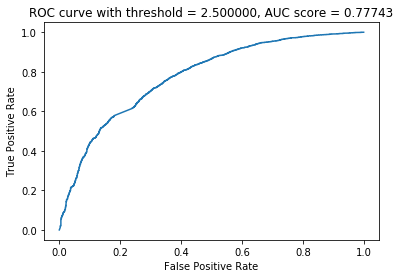

Computing the pearson similarity matrix...
Done computing similarity matrix.


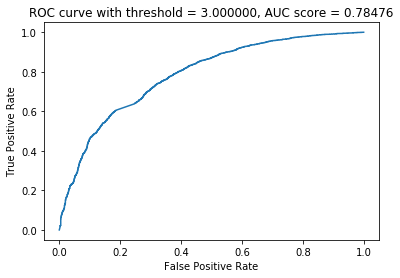

Computing the pearson similarity matrix...
Done computing similarity matrix.


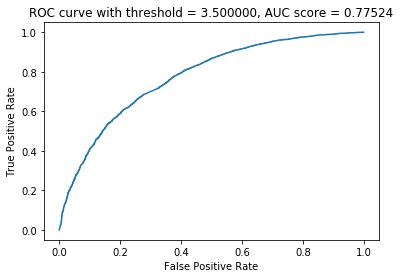

Computing the pearson similarity matrix...
Done computing similarity matrix.


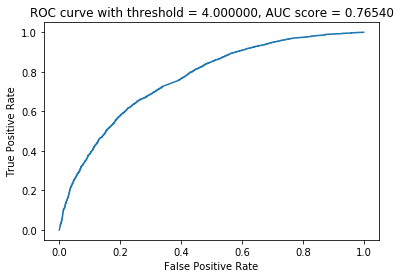

In [42]:
# question 15 - plot ROC
# k = 20 in both cases
from surprise.model_selection import train_test_split
from sklearn.metrics import  roc_curve
from sklearn.metrics import roc_auc_score

thresholds = [2.5, 3, 3.5, 4]
trainset, testset = train_test_split(data, test_size=0.1)

for threshold in thresholds:
    knn = KNNWithMeans(k=20, sim_options={'name': 'pearson'})
# train and test algorithm
    knn.fit(trainset)
    predicted = knn.test(testset)

    actual_y = []
    pred_y = []
    for i in range(len(predicted)):
        pred_y.append(predicted[i].est)
        if testset[i][2] >= threshold:
            actual_y.append(1)
        else:
            actual_y.append(0)
    

    fpr, tpr, thresholds = roc_curve(actual_y, pred_y)
    AUC = roc_auc_score(actual_y, pred_y)
    plt.plot(fpr,tpr)
    plt.title('ROC curve with threshold = %f, AUC score = %.5f' %(threshold, AUC))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()


In [ ]:
##question 16 answer in report

In [ ]:
# question 17 NNMF k from 2 to 50, step size 2
from surprise.prediction_algorithms.matrix_factorization import NMF

k_range = range(2,51,2)

    
RMSE = []
MAE = []

for k in range(2,51,2):
    knn = KNNWithMeans(k=k, sim_options = {'name': 'pearson'})
    cv = cross_validate(knn, data, measures=['RMSE','MAE'],cv=10, verbose=False)
    RMSE.append(np.mean(cv['test_rmse']))
    MAE.append(np.mean(cv['test_mae']))
    
plt.plot(k_range, RMSE)
plt.title("NMF: Average RMSE vs k")
plt.xlabel("k values")
plt.ylabel("Average RMSE")
plt.show()

plt.plot(k_range, MAE)
plt.title("NMF: Average MAE vs k")
plt.xlabel("k values")
plt.ylabel("Average MAE")
plt.show()


Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.